In [12]:
# Librosa => python package for music & audio
# https://librosa.org/doc/latest/index.html
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct

  Cloning https://github.com/detly/gammatone.git to /tmp/pip-req-build-07vxjv_w
  Running command git clone --filter=blob:none --quiet https://github.com/detly/gammatone.git /tmp/pip-req-build-07vxjv_w
  Resolved https://github.com/detly/gammatone.git to commit 0626328ef7c31d3b33214db2fdcd52e8601eb4c5
  Preparing metadata (setup.py) ... done


In [31]:
#!pip install git+https://github.com/detly/gammatone.git
# https://detly.github.io/gammatone/gtgram.html
import gammatone
from gammatone import gtgram as gt

In [8]:
# Load Speech Audio
audio = librosa.example('libri1')
# sr => sampling rate, y => audio time series
# https://librosa.org/doc/main/generated/librosa.load.html
y, sr = librosa.load(audio, sr=None)

In [10]:
# Mel Spectrogram
mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
# Convert spectrogram to decibel scale => more interpretable
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

In [41]:
# Gammatone Spectrogram
fmin = 50 # low frequencies
gamma_spec = gt.gtgram(y, sr, 0.025, 0.010, 64, fmin)

In [20]:
# Applying DCT to Mel
# Default type 2
# https://docs.scipy.org/doc/scipy-1.12.0/reference/generated/scipy.fftpack.dct.html
mfcc = dct(mel_spec_db, axis=0, norm='ortho')

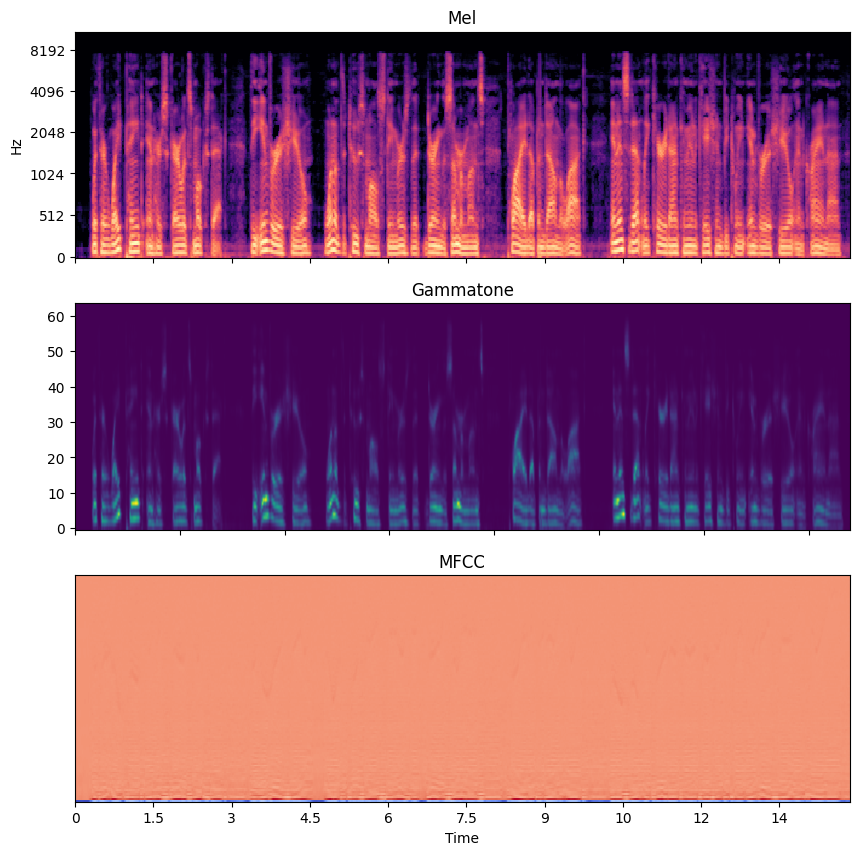

In [42]:
# Display Spectrograms
fig, ax = plt.subplots(3, 1, figsize=(10, 10))
librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='mel', ax=ax[0])
ax[0].set(title='Mel')
ax[1].imshow(gamma_spec, aspect='auto', origin='lower')
ax[1].set(title='Gammatone')
librosa.display.specshow(mfcc, sr=sr, x_axis='time', ax=ax[2])
ax[2].set(title='MFCC')
ax[0].label_outer()
ax[1].label_outer()
ax[2].label_outer()
plt.show()